## Методика Propensity score matching (PSM)

### Теория:

***Вспоминаем какие методики Causal inference cуществуют*** (Рассмотрим основные группы:)
* Рандомизированные a/b тесты - эталонный метод (выбираем его, если есть возможность)
* Counterfactuals analysis (анализ гипотетического поведения) (синтетический контроль: causal impact, syn diff in diff)
* Квази-эксперименты (diff in diff, Propensity score matching, regression discontinuity,
Instrumental variables) - квази потому что деление на группы происходить не рандомно, а может по региону, по платформе и пр.

***Matching*** - группа методов, основанная на сопоставлении реальных единиц наблюдения. Наблюдения из одной группы подвергались воздействию нововведения на себя (treatment), а из другой - нет. Группа с treatment - тестовая, а без него — контрольная.
* Для лучшего сравнения важно убедиться, что группы имеют схожие характеристики. Мы сравниваем одинаковых пользователей по определенной логике и таким образом убираем возможные смещения скрытых влияющих ковариат (конфаундеров — переменных в статистике, которые влияют как назависимую, так и на независимую переменные, результатом чего является ложная зависимость).

Для каждой пары из тестовой и контрольной группы считается эффект и получается оценка нового способа говорить об эффекте:

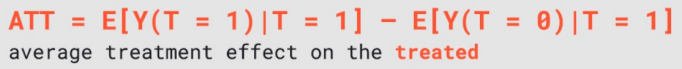

***ATT (average treatment effect on the treated — средний эффект воздействия для тех, кто подвергся воздействию)*** — часто это более важная метрика эффекта для бизнеса, чем обычный средний эффект, измеряемый в А/В-тесте. АТТ оценивает эффект для treatment группы, а ATE (average treatment effect - средний эффект воздействия), скорее всего, будет зашумлять воздействие из-за того, что учитывает еще и эффект для контрольной группы.

***Matching-методы:***
1. ***Exact Matching.***(точное совпадение) Сопоставляет наблюдения в тестовой группе с наблюдениями в контрольной, имеющими одинаковые значения одной или нескольких ковариат.
2. ***Propensity Score Matching.*** Сопоставляет наблюдения в тестовой группе с наблюдениями в контрольной с похожими склонностями, которые оцениваются с помощью ML-модели, где таргет — использование treatment. Mетод оценивает склонность к treatment.
3. ***Mahalanobis Distance Matching.*** Coпоставляет наблюдения в тестовой группе с наблюдениями в контрольной с похожими расстояниями Махаланобиса, которые измеряют расстояние между наблюдением и средним значением набора наблюдений.
4.  ***Coarsened Exact Matching.*** Включает разделение непрерывных ковариат на категории, а затем сопоставление наблюдений в тестовой группе с наблюдениями в контрольной с теми же категориями значений ковариат.
5.  ***Covariate Balancing Propensity Score.*** Стремится оптимизировать баланс ковариат между группами теста и контроля, прямо оценивая склонность (propensity) k treatment, которая минимизирует разницу между распределениями ковариат.


В методиках матчинга все «крутится» вокруг концепта расстояния и «похожестости». Различия между методиками проявляются в способах замера этих расстояний и их сопоставлений. Рассмотрим самый простой способ - Exact Matching.

### Exact matching
Каждое (і-ое) наблюдение можно представить как вектор, например, по трем характеристикам: цвет, возраст, пол. Соответственно, если дистанция между их характеристиками равна нулю, то это полное совпадение (exact match) между людьми.

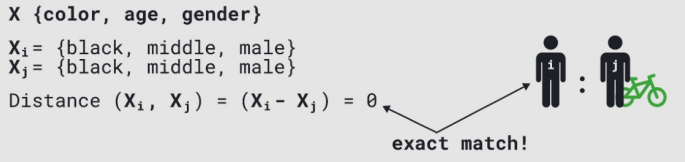

Проблема такого метода в том, что если характеристик не три, а много (например, 100), то найти полное
совпадение маловероятно, для сравнения получатся очень маленькие группы.

* С помощью понятия расстояния можно оценивать «похожесть» (близость) одного наблюдения на другое или на центр групп.
* Можно задавать пороговые границы близости, при которых мы считаем, что наблюдения
похожи. 
* Сами расстояния можно считать разными способами. Выбор способа зависит в основном от того, какие фичи у вас есть (категорийные, непрерывные и т.п.).

### Propensity Score Matching (PSM, сопоставление наблюдений по склонности совершения treatment действий)

Если ковариаты имеют слишком большое количество значений, то чтобы обойти проблему ненаблюдаемых ковариат, можно сравнивать дистанцию не между ковариатами, а между некоторой функцией от них.
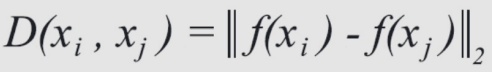

Одной из таких функций может быть так называемая ***propensity score (PS, индекс склонности совершить treatment)***. Это вероятность получить treatment=1, которую можно предсказать с помощью ml-моделей.

### LOGIT
При использовании логистической регрессии и прогнозировании treatment вместо предсказания бинарнойпеременной мы предсказываем непрерывную переменную (р) со значениями на отрезке [0,1] при любых значениях независимых переменных.

Это достигается применением следующего регрессивного уравнения (логит-преобразования):
$$p=\frac{1}{1+e^{-y}}$$
p-вероятность того, что произойдет событие
y-стандартное уравнение регрессии
Выражаем y:
$$y = log_e \frac{p}{1-p}$$

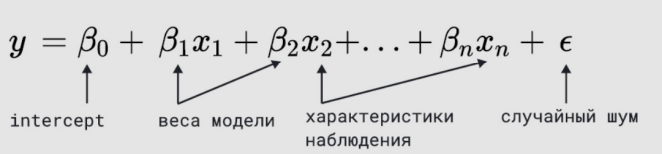

PSM использует функцию склонности к совершению treatment для оценки расстояния на основе информации про характеристики наблюдения. Это позволяет решить сразу две задачи: найти максимально похожих по вероятности воспользоваться treatment и учесть те параметры, по которым мы хотели бы сравнивать«похожесть».

Благодаря PSM мы можем брать на вход сложные или большие комбинации фичей, в отличие от Exact matching. И ML-модель лучше понимает скрытые паттерны в многомерных характеристиках наблюдения.

***Алгоритм PSM:***

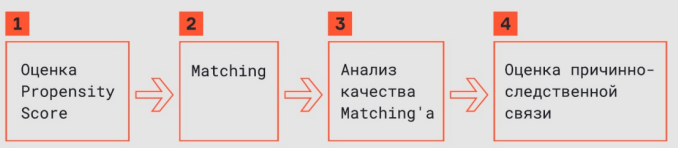


### 1. Оценка PS (индекса склонности совершить treatment). Каждый пользователь получает свое значение.

* Желательно не перегружать регрессорами, нужно использовать те характеристики, по которым логично сравниать
* Используйте scaler (стандартизацию и нормализацию данных). Подойдут все рекомендации по feature engineering для регрессионных моделей.
* Правильно закодируйте категорийные переменные (хотя бы сделайте dummy encoding).
* Оценка модели может производится по метрике AIC (критерий Акаике) или по правдоподобию.

In [ ]:
# Приведем пример простой оценки PS, без дополнительной обработки данных и использования специальных
# метрик оценки модели. Используем библиотеку psmpy:
from psmpy import PsmPy
psm = PsmPy(df_, treatment=treatment, indx = 'id', exclude = to_exclude)
psm.logistic_ps(balance = False)
df_pred = psm.predicted_data.sort_values(by = 'id')

### 2. Matching. Подбираем пары по значению PS

* В зависимости от баланса treatment/control нужно выыбрать правильную стратегию подбора пар (из control в treatment или наоборот), но помните, что замеряемый эффект будет меняться (ATT, ATC (average treatment effect on the control — средний эффект в контроле)).
  
***Что допускается делать с matching в PSM:***
* использовать наблюдения повторно из-за несбалансированности групп. То есть одного пользователя из контроля использовать для нескольких пар. Но этим лучше не увлекаться
* делать несбалансированные выборки, если нужно. Но сильно не сбалансированные лучше не делать
* использовать порог близости, чтобы ограничить матчинг для не совсем похожих


In [ ]:
# Проведем матчинг пар по PS logit, основанный на алгоритме ближайших соседей:
psm.knn_matched(matcher='propensity_logit', replacement=True, caliper=None, drop_unmatched=True)
df_matched = psm.df_matched

### 3. Анализ качества матчинга. Проверяем, насколько хорошо мы сопоставили пары.
* Прежде всего нужно проверить, стали ли распределения значений характеристик наблюдения в treatment и control ближе после матчинга. Если стали, то матчинг прошел успешно.
* Также проверьте, как выглядит значение PS до и после. Они также должны сравняться. При этом РЅ для контроля должен приблизиться к распределению PS для treatment, eсли вы находили пару из контроля к treatment, и наоборот.

In [ ]:
# график, показывающий различия (стандартизированная разница СohenD) между treatment и control для каждой фичи в датасете
psm.effect_size_plot()
# график распределения значений PS
psm.plot_match()

### 4. Оценка эффекта (причинно-следственной связи).
* Помните, какой вариант эффекта вы находите (АТТ, АТС, ATE).
* Можно использовать известные критерии для рандомизированных тестов (t-test, z-test и тп), либо использовать готовые пакеты (DoWhy, causalinference, CausalML, и др.).

### Требования к методике:
1. Данные по treatment группе должны быть относительно сбалансированы с контрольной группой
(желательно, чтобы она составляла не менее 30%). Если контрольной группы нет, то неоткуда брать пары для матчинга, методика не может работать.
2. Если воздействие всеобъемлющее (например, изменение на главной странице, с которым
взаимодействуют все пользователи), использование методик matching невозможно.
3. Должны быть измеренные ковариаты/регрессоры (чтобы оценить, как они влияют, их надо замерить).
4. Ковариаты/регрессоры должны помогать выравнивать распределение (т.е. находить похожих). При этом
сама модель регрессии не обязательно должна быть суперточной.
5. Эффект от treatment не должен оказывать воздействие на контрольную группу.

### Плюсы PSM:
* Позволяет уменьшить смещение (confounding bias), которое может возникнуть из-за различий в характеристиках между тестовой и контрольной группой
* Позволяет выбирать разные виды сопоставления (например, один к одному, ядерное сопоставление) в зависимости от характеристик данных и исследовательского вопроса
* Результаты PSM обычно легко интерпретировать, так как они позволяют сравнить группы на основе наблюдаемых характеристик
* Можно применять ту же логику размера групп, что и в обычном А/В-тесте (чем больше выборка - тем выше мощность и др.)
* Можно использовать свои ML-модели, которые возвращают вероятность, делать на них logit
преобразование и использовать для поиска пар


### Минусы PSM:
* Не работает на фичах, где воздействие всеобъемлющее
* Выбор правильных ковариат может быть сложным и требовать экспертных знаний и методов для оценки их важности
* Если в данных отсутствуют значения ковариат для некоторых наблюдений, это может создать проблемы при проведении сопоставления. То же верно и для выбросов в данных
* Результаты PSM могут зависеть от выбора модели для расчета склонности. Разные модели могут привести к разным результатам

• Кроме того, как и все Causal Inference методики, PSM показывает мощность несколько ниже, чем t-test.


### Практика:

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk')
from sklearn.preprocessing import StandardScaler
from causalinference import CausalModel
from psmpy import PsmPy
from scipy import stats as st
import joblib
from scipy.stats import norm, ttest_ind
from tqdm import tqdm
from joblib import Parallel, delayed

# 1. Рассмотрим реальный кейс из классифайда недвижимости
В некоторые объявления о продаже квартир добавили дополнительный контентный блок (treatment). Блок ипотечного калькулятора. Для того чтобы увеличить конверсию в добавление объявления в Избранное (наш outcome, целевая конверсия). Конверсия не бинарная. Воспринимать лучше как CTR по этой объявке добавления в избранное по всем просмотрам.

In [4]:
#загружаем данные
data = pd.read_csv('dataset_for_psm.csv', index_col = 0)
data

,year,floor,rooms,price,square,is_it_capital,treatment,cr,id
0,1975.00,5.00,1,8000,30.00,0,0,0.00,0
1,1970.00,2.00,1,8000,32.00,0,1,0.00,1
2,1980.00,1.00,1,7000,37.00,0,1,0.00,2
3,1975.00,3.00,1,5000,31.00,0,1,0.00,3
4,1985.00,8.00,1,10000,34.00,0,1,0.00,4
...,...,...,...,...,...,...,...,...,...
35149,1970.00,1.00,1,12000,36.00,0,1,0.00,35149
35150,1980.00,2.00,1,8000,33.00,0,1,0.00,35150
35151,2007.00,6.00,1,7500,38.00,1,1,0.00,35151
35152,1989.00,2.00,1,8000,30.00,0,1,0.00,35152


Загружаем данные где мы имеем CTR (cr), на которую хотим оценить влияние воздействия (treatment)

In [5]:
treatment = 'treatment'
outcome = 'cr'

## 2. EDA

In [6]:
# средняя конверсия
print('Средняя конверсия = ', round(data['cr'].mean(), 5))
print('Средняя конверсия в группе без воздействия = ', round(data['cr'][data['treatment'] == 0].mean(), 6))
print('Средняя конверсия в группе с воздействием = ', round(data['cr'][data['treatment'] == 1].mean(), 6))

Средняя конверсия =  0.00567
Средняя конверсия в группе без воздействия =  0.00567
Средняя конверсия в группе с воздействием =  0.005669


In [7]:
# доля treatment в группах
print('Доля treatmnt group' , round(data.treatment.mean(), 3))

Доля treatmnt group 0.724


In [8]:
# небольшой summary 
df = data.copy()
df.groupby('treatment').mean()

,year,floor,rooms,price,square,is_it_capital,cr,id
treatment,,,,,,,,
0,1812.45,4.08,1.42,11292.01,48.43,0.37,0.01,12164.47
1,958.32,4.92,1.50,13623.90,50.77,0.49,0.01,19640.68


#### Посмотрим как распределены фичи нашего датасета  в зависимости treatment это или контроль

In [9]:
df.treatment = df.treatment.astype(bool)
df = data.copy()

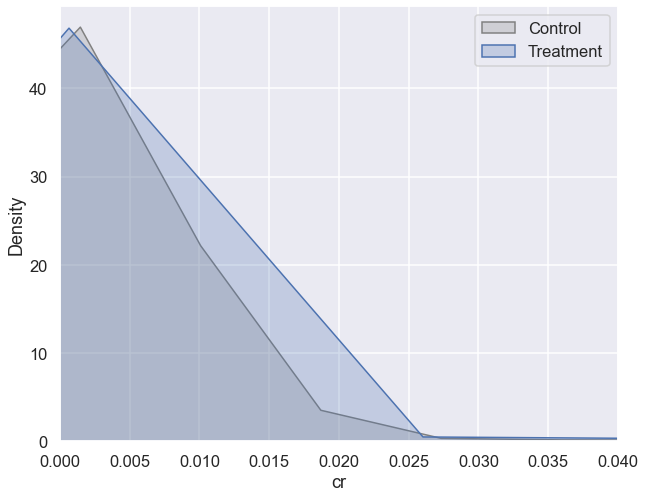

In [84]:
# посмотрим небольшой кусочек распределения cr
sns.kdeplot(df[df['treatment']==0].cr, fill = True, label = 'Control', color = 'grey')
sns.kdeplot(df[df['treatment']==1].cr, fill = True, label = 'Treatment')
plt.xlim(0, 0.04)
plt.legend();

Оцениваем распределения метрики по treatment'у, где treatment = 0 - это контроль, а где 1 это treatment.

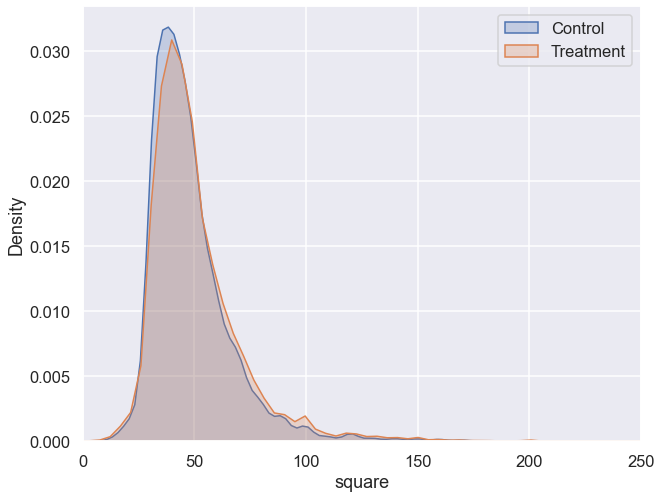

In [85]:
# площадь квартиры
sns.kdeplot(data = df[df['treatment']==0], x = 'square', fill = True, label = 'Control')
sns.kdeplot(data = df[df['treatment']==1], x = 'square', fill = True, label = 'Treatment')
plt.xlim(0, 250)
plt.legend();

Так же давайте посмотрим на ковариаты, как они распределены по treatment'у. Первым делом это площадь, видим что в принципе распределения похожи

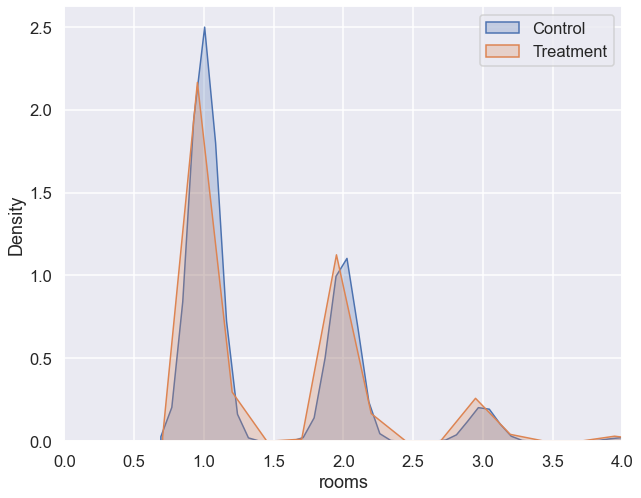

In [86]:
# кол-во комнат квартиры
sns.kdeplot(data = df[df['treatment']==0], x = 'rooms', fill = True, label = 'Control')
sns.kdeplot(data = df[df['treatment']==1], x = 'rooms', fill = True, label = 'Treatment')
plt.xlim(0, 4)
plt.legend();

Похожая ситуация с ковариатой комнатностью

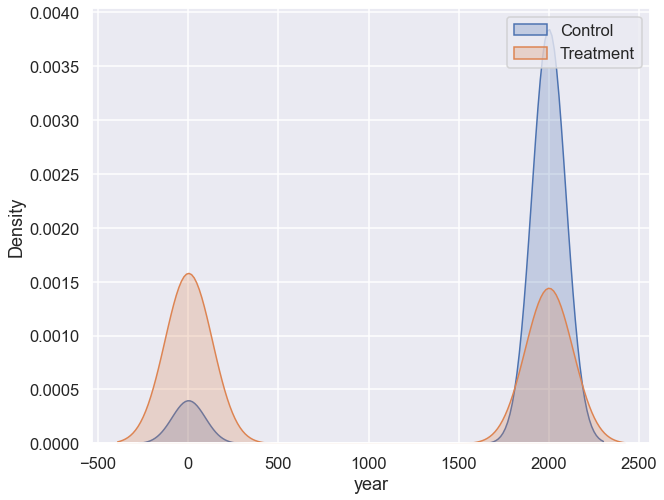

In [87]:
# год постройки квартиры
sns.kdeplot(data = df[df['treatment']==0], x = 'year', fill = True, label = 'Control')
sns.kdeplot(data = df[df['treatment']==1], x = 'year', fill = True, label = 'Treatment')
plt.legend();

По ковариате году постройки, можем видеть что распределения не совсем равны, так как год постройки является необязательным параметром, при замене пустых значении на 0, больше всего было пустых в treatment, а в control было больше значении со средним 2000 годом постройки.

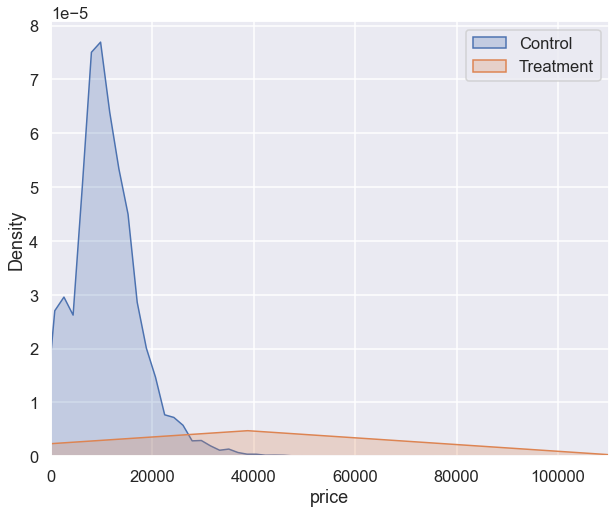

In [88]:
# цена квартиры квартиры
sns.kdeplot(data = df[df['treatment']==0], x = 'price', fill  = True, label = 'Control')
sns.kdeplot(data = df[df['treatment']==1], x = 'price', fill = True, label = 'Treatment')
plt.xlim(0, 110000)
plt.legend();

По ценовой ковариате можно видеть что распределения очень сильно разнятся

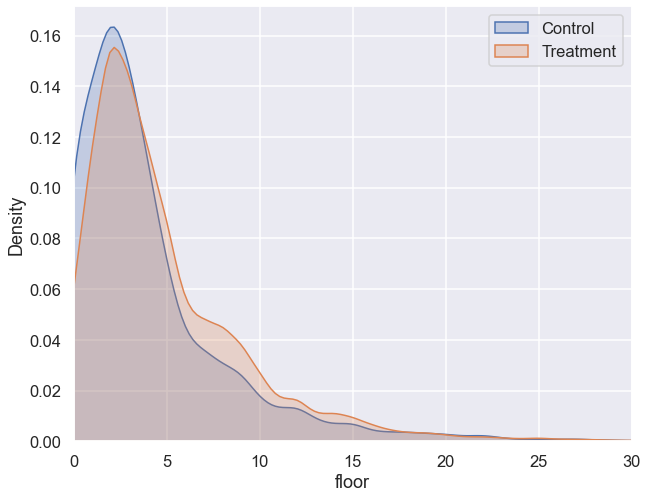

In [89]:
# этаж на котором находится квартира
sns.kdeplot(data = df[df['treatment']==0], x = 'floor', fill = True, label = 'Control')
sns.kdeplot(data = df[df['treatment']==1], x = 'floor', fill = True, label = 'Treatment')
plt.xlim(0, 30)
plt.legend();

С ковариатой этажность особо проблем нет

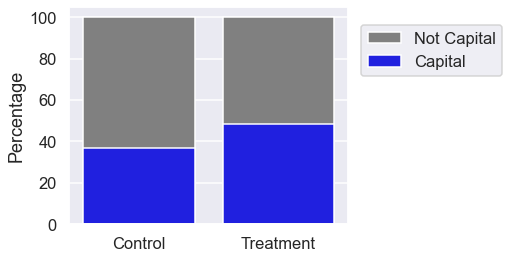

In [90]:
c_label = 'Capital'
nc_label = 'Not Capital'
table_cap = 100 * pd.crosstab(df['treatment'].replace({1: 'Treatment', 
                                                  0: 'Control'}), 
                           df['is_it_capital'].replace({1: c_label,
                                                    0: nc_label}), 
                           normalize = 'index')
table_cap['All'] = 100
plt.figure(figsize=(5, 4))
sns.barplot(data = table_cap, x = table_cap.index.astype(str),  y = "All", 
            label = nc_label, color = 'gray')
sns.barplot(data = table_cap, x = table_cap.index.astype(str),  y = c_label, 
            label = c_label, color = 'blue')
plt.legend(loc = 'center', bbox_to_anchor = (1.3, 0.8))
plt.xlabel('')
plt.ylabel('Percentage');

По бинарной ковариате столица ли, можно видеть что в контрольной меньше столиц и это как-то может повлиять на метрику которую мы оцениваем (конверсия)

## 3. Обучаем PSM модель

Подготавливаем данные, делаем небольшой preprocessing ковариат с помощью стандартизации значении отняв среднее и поделив на стандартное отклонение

In [91]:
# препроцессинг
X = df.drop(['id', 'cr', 'treatment'], axis = 1)
X_scaled = StandardScaler().fit_transform(X)
scaled_column_names = [column + '_scaled' for column in X.columns]
df_scaled = pd.DataFrame(X_scaled, columns=scaled_column_names)
df = pd.concat([df, df_scaled], axis = 1)

In [92]:
df_ = df.copy()

In [93]:
df_.head()

,year,floor,rooms,price,square,is_it_capital,treatment,cr,id,year_scaled,floor_scaled,rooms_scaled,price_scaled,square_scaled,is_it_capital_scaled
0,1975.00,5.00,1,8000,30.00,0,0,0.00,0,0.80,0.07,-0.66,-0.06,-0.91,-0.91
1,1970.00,2.00,1,8000,32.00,0,1,0.00,1,0.79,-0.60,-0.66,-0.06,-0.82,-0.91
2,1980.00,1.00,1,7000,37.00,0,1,0.00,2,0.80,-0.82,-0.66,-0.07,-0.59,-0.91
3,1975.00,3.00,1,5000,31.00,0,1,0.00,3,0.80,-0.38,-0.66,-0.10,-0.86,-0.91
4,1985.00,8.00,1,10000,34.00,0,1,0.00,4,0.81,0.74,-0.66,-0.04,-0.73,-0.91


In [94]:
# попробуем для каждого наблюдения найти propensity_score и propensity_logit
to_exclude = X.columns.tolist() 
to_exclude.append(outcome)
psm = PsmPy(df_, treatment=treatment, indx = 'id', exclude = to_exclude) # исключаем не скалированные колонки и обучаем psm
psm.logistic_ps(balance = False) 
df_pred = psm.predicted_data.sort_values(by = 'id')
cols_tc = list(X.columns) + ['id']
df_pred = df_pred.merge(df_[cols_tc], on = ['id'])
df_pred.treatment = df_pred.treatment.astype(bool)
df_pred 

,id,year_scaled,floor_scaled,rooms_scaled,price_scaled,square_scaled,is_it_capital_scaled,propensity_score,propensity_logit,treatment,year,floor,rooms,price,square,is_it_capital
0,0,0.80,0.07,-0.66,-0.06,-0.91,-0.91,0.55,0.19,False,1975.00,5.00,1,8000,30.00,0
1,1,0.79,-0.60,-0.66,-0.06,-0.82,-0.91,0.53,0.10,True,1970.00,2.00,1,8000,32.00,0
2,2,0.80,-0.82,-0.66,-0.07,-0.59,-0.91,0.51,0.04,True,1980.00,1.00,1,7000,37.00,0
3,3,0.80,-0.38,-0.66,-0.10,-0.86,-0.91,0.53,0.10,True,1975.00,3.00,1,5000,31.00,0
4,4,0.81,0.74,-0.66,-0.04,-0.73,-0.91,0.57,0.28,True,1985.00,8.00,1,10000,34.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35149,35149,0.79,-0.82,-0.66,-0.01,-0.64,-0.91,0.52,0.10,True,1970.00,1.00,1,12000,36.00,0
35150,35150,0.80,-0.60,-0.66,-0.06,-0.77,-0.91,0.52,0.09,True,1980.00,2.00,1,8000,33.00,0
35151,35151,0.83,0.29,-0.66,-0.07,-0.55,1.10,0.61,0.45,True,2007.00,6.00,1,7500,38.00,1
35152,35152,0.81,-0.60,-0.66,-0.06,-0.91,-0.91,0.52,0.08,True,1989.00,2.00,1,8000,30.00,0


На выходе мы получаем дополнительные колонки для исходного датафрейма в виде Propensity Score, Propensity Logit

Propensity Score - Логистическая регрессия, для y - treatment = 1, x - price, rooms, year, ... т.е. ковариаты. Propensity Score это вероятность быть в treatment'е имея фичи - x. Математически, это выглядит следующим образом: $P(T=1|X)$

Propensity Logit - В логистической регрессии есть логит-функция - это математическая функция, которая преобразовывает вероятность события [0, 1] в вещественное число в логарифмическом масштабе. С помощью этого и делается обычно сам matching.

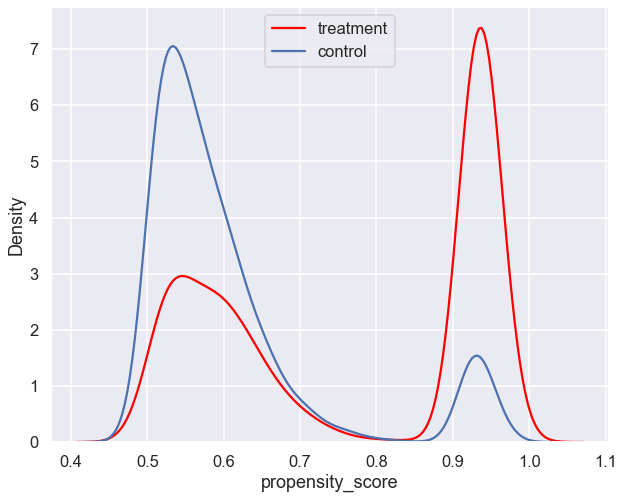

In [95]:
# посмотрим различия в propensity score (вероятность совершить treatment) между treatment и control
sns.kdeplot(df_pred['propensity_score'][df_pred['treatment']], color = 'red', label = 'treatment')
sns.kdeplot(df_pred['propensity_score'][~df_pred['treatment']], label = 'control')
plt.legend()

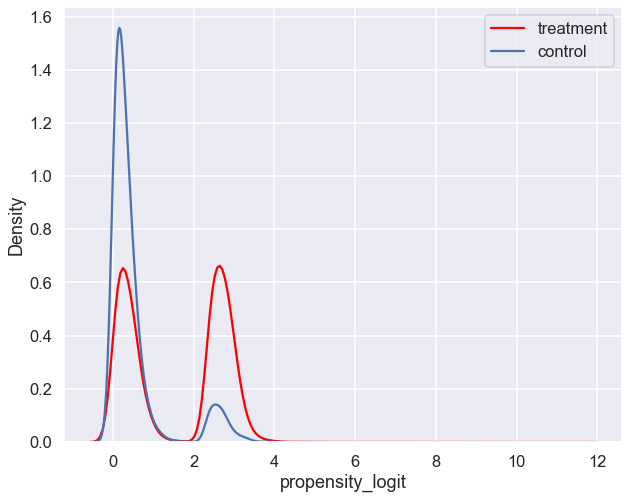

In [96]:
# посмотрим различия в propensity logit между treatment и control
sns.kdeplot(df_pred['propensity_logit'][df_pred['treatment']], color = 'red', label = 'treatment')
sns.kdeplot(df_pred['propensity_logit'][~df_pred['treatment']], label = 'control')
plt.legend()

## 3. Проводим матчинг пар по PS logit

In [97]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=True, caliper=None, drop_unmatched=True) 

df_matched = psm.df_matched
df_matched = df_matched.merge(df_[cols_tc], on = ['id'])

df_matched

C:\Users\adilbek\Anaconda3\lib\site-packages\psmpy\psmpy.py:363: UserWarning: Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False
  warnings.warn('Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False')


Wall time: 36.4 s


,id,year_scaled,floor_scaled,rooms_scaled,price_scaled,square_scaled,is_it_capital_scaled,propensity_score,propensity_logit,treatment,matched_ID,year,floor,rooms,price,square,is_it_capital
0,0,0.80,0.07,-0.66,-0.06,-0.91,-0.91,0.55,0.19,0,17150.00,1975.00,5.00,1,8000,30.00,0
1,15,0.80,-1.04,-0.66,-0.04,-0.68,1.10,0.58,0.31,0,758.00,1981.00,0.00,1,10000,35.00,1
2,18,0.82,-0.60,-0.66,-0.01,-0.68,1.10,0.59,0.37,0,12241.00,1999.00,2.00,1,12000,35.00,1
3,23,0.81,-1.04,2.10,0.02,0.90,-0.91,0.57,0.29,0,17505.00,1990.00,0.00,3,15000,70.00,0
4,29,0.80,0.74,-0.66,-0.11,-0.32,-0.91,0.56,0.23,0,11300.00,1980.00,8.00,1,4000,43.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19404,11308,0.84,-0.38,0.72,0.02,2.03,-0.91,0.54,0.18,1,NaN,2017.00,3.00,2,15000,95.00,0
19405,6660,0.79,-0.82,0.72,-0.06,-0.01,-0.91,0.55,0.18,1,NaN,1970.00,1.00,2,8000,50.00,0
19406,6034,0.81,0.07,2.10,-0.04,0.45,-0.91,0.61,0.43,1,NaN,1988.00,5.00,3,10000,60.00,0
19407,14885,0.81,-0.82,-0.66,-0.04,-0.86,-0.91,0.52,0.07,1,NaN,1985.00,1.00,1,10000,31.00,0


Мы делаем matching 1:1 с помощью psm.knn_matched. Для каждого treatment = 0 (контрольная), находим похожее но с treatment = 1. Итоговый датафрейм это наблюдения с treatment = 0 & конкатинированные (добавленные значения по строкам) похожие наблюдения но с treatment = 1.

С помощью метода psm.knn_matched_12n можно делать matchin 1:N, где N это количество раз, когда мы делаем matching меньшего класса с большим классом.

Заметка: с помощью этих методов происходит matching меньшего класса treatment'a с большим классом, соотвественно, чтобы делать сопоставление для treatment = 1, важно чтобы в этой группе было меньше наблюдении чем в группе с treatment = 0.

In [98]:
# подсчитаем кол-во наблюдений для матчинга
matched_ids = psm.matched_ids

to_match = df.query("id == @matched_ids.id.values.tolist()").treatment.value_counts()
matched = df.query("id == @matched_ids.matched_ID.values.tolist()").treatment.value_counts()

print('Для всех treatment = {0} значении:'.format(to_match.index[0]), to_match.values[0])
print('Есть matching для treatment = {0} значении:'.format(matched.index[0]), matched.values[0])

Для всех treatment = 0 значении: 9706
Есть matching для treatment = 1 значении: 5855


In [99]:
# пример одного матча #13739
matched_ids[matched_ids['matched_ID'] == 13739]

,id,matched_ID
2655,6928,13739
8258,19591,13739
9704,35138,13739


In [100]:
# пример одного матча  'matched_ID' == 17150  or #13739
df_matched[(df_matched['id'] == 6928) | (df_matched['id'] == 19591) | (df_matched['id'] == 35138)]

,id,year_scaled,floor_scaled,rooms_scaled,price_scaled,square_scaled,is_it_capital_scaled,propensity_score,propensity_logit,treatment,matched_ID,year,floor,rooms,price,square,is_it_capital
2655,6928,0.82,-0.82,0.72,-0.04,0.67,-0.91,0.54,0.15,0,13739.00,1995.00,1.00,2,10000,65.00,0
8258,19591,0.83,0.07,-0.66,-0.05,-0.46,-0.91,0.54,0.15,0,13739.00,2008.00,5.00,1,9000,40.00,0
9704,35138,0.81,-0.15,-0.66,-0.06,-0.86,-0.91,0.54,0.15,0,13739.00,1986.00,4.00,1,8000,31.00,0


In [101]:
# делаем merge для матчинга наблюдений друг с другом
matching_for_class = to_match.index.values[0]

cols_1 = X.columns.tolist() + ['propensity_score']

matches = pd.merge(df_matched[df_matched[treatment]==matching_for_class].loc[:, cols_1 + ['matched_ID']], 
                   df_pred.loc[:, cols_1], left_on='matched_ID', 
                   right_index=True, 
                   how='left', suffixes=('_c', '_t'))
# остается сматчиный датасет ставший теперь очень похож на control
matches

,year_c,floor_c,rooms_c,price_c,square_c,is_it_capital_c,propensity_score_c,matched_ID,year_t,floor_t,rooms_t,price_t,square_t,is_it_capital_t,propensity_score_t
0,1975.00,5.00,1,8000,30.00,0,0.55,17150.00,2017.00,6.00,1,14990,55.00,0,0.55
1,1981.00,0.00,1,10000,35.00,1,0.58,758.00,1985.00,4.00,2,16000,57.00,0,0.58
2,1999.00,2.00,1,12000,35.00,1,0.59,12241.00,1970.00,5.00,2,15000,46.00,0,0.59
3,1990.00,0.00,3,15000,70.00,0,0.57,17505.00,1990.00,0.00,3,15000,70.00,0,0.57
4,1980.00,8.00,1,4000,43.00,0,0.56,11300.00,1990.00,2.00,2,12000,45.00,0,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9701,1985.00,1.00,1,10000,31.00,0,0.52,14885.00,1985.00,1.00,1,10000,31.00,0,0.52
9702,2000.00,2.00,2,15000,55.00,0,0.56,5201.00,1979.00,2.00,2,10000,45.00,0,0.56
9703,1990.00,4.00,2,12000,52.00,0,0.57,6500.00,1970.00,3.00,2,13000,52.00,0,0.57
9704,1986.00,4.00,1,8000,31.00,0,0.54,13739.00,1978.00,4.00,1,7000,32.00,0,0.54


In [102]:
# пример
matches[matches['matched_ID'] == 13739.00] #

,year_c,floor_c,rooms_c,price_c,square_c,is_it_capital_c,propensity_score_c,matched_ID,year_t,floor_t,rooms_t,price_t,square_t,is_it_capital_t,propensity_score_t
2655,1995.00,1.00,2,10000,65.00,0,0.54,13739.00,1978.00,4.00,1,7000,32.00,0,0.54
8258,2008.00,5.00,1,9000,40.00,0,0.54,13739.00,1978.00,4.00,1,7000,32.00,0,0.54
9704,1986.00,4.00,1,8000,31.00,0,0.54,13739.00,1978.00,4.00,1,7000,32.00,0,0.54


Для контрольной группы (где не было treatment'a) 9706 значении, мы сопоставили (matching) 5855 значении где был treatment.

Сверху можно видеть для наглядности датафрейм, как выглядят исходные данные с treatment = 0, то что значения слева с окончанием на _t. И справа их match с параметрами с окончанием на _с. Можно наблюдать что данные match'ей зачастую схожи по ковариатам с тем, чем делает сам matching.

## 4. Посмотрим как изменились распределения фичей. До и после матчинга

На графиках можем наблюдать как меняются распределения ковариат по treatment'у до и после матчинга. Можем видеть что все ковариаты стали очень похожими. Именно так и проверяется произошел ли "хороший" матчинг в PSM

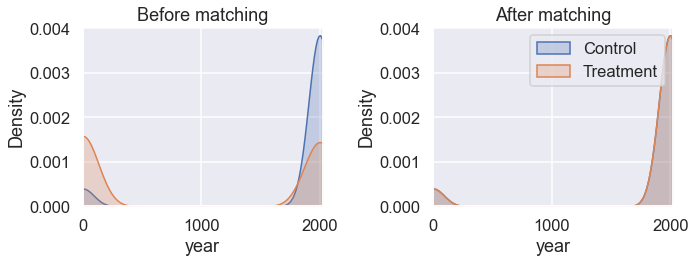

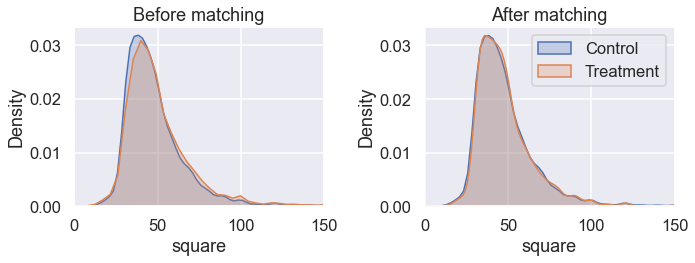

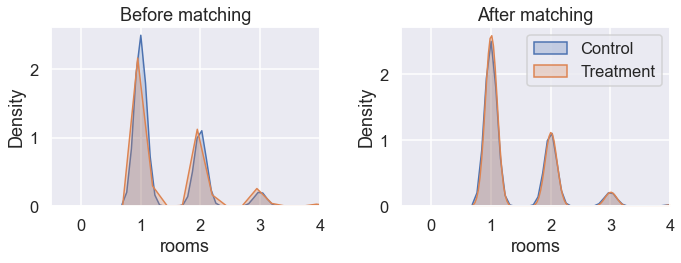

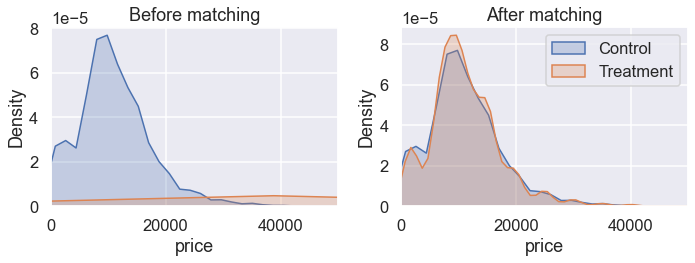

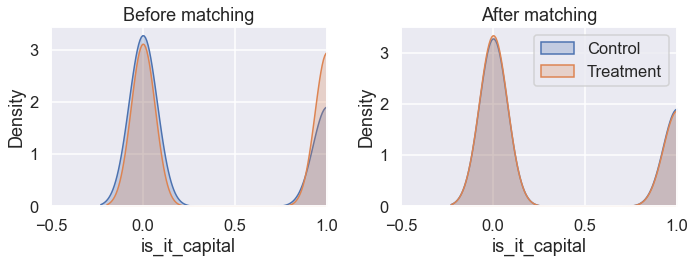

In [103]:
cols_td = ['year', 'square', 'rooms', 'price', 'is_it_capital']
xlim = (df_pred[cols_td].quantile(0), df_pred[cols_td].quantile(0.99))

for x in cols_td:
    fig, ax = plt.subplots(1, 2, figsize = (10, 4))

    sns.kdeplot(data = df_pred[df_pred[treatment] == False], x = x, label = 'Control', fill=True, ax=ax[0])
    sns.kdeplot(data = df_pred[df_pred[treatment] == True], x = x, label = 'Treatment', fill=True, ax=ax[0])
    ax[0].set_title('Before matching')
    ax[0].set_xlim(xmin = -0.5, xmax = df_pred[x].quantile(0.995))

    sns.kdeplot(data = df_matched[df_matched[treatment] == False], x = x, label = 'Control', fill=True, ax=ax[1])
    sns.kdeplot(data = df_matched[df_matched[treatment] == True], x = x, label = 'Treatment', fill=True, ax=ax[1])
    ax[1].set_title('After matching')
    ax[1].set_xlim(xmin = -0.5, xmax = df_pred[x].quantile(0.995))

    plt.tight_layout()
    plt.legend()

Так же можно посмотреть на описательную статистику ковариат до и после matching'а и убедиться по цифрам что распределения стали очень похожими.

In [104]:
# отрисуем разницу в средних между tretment и control до матчинга и после матчинга
cols_td = ['year', 'square', 'rooms', 'price', 'is_it_capital']

for i in cols_td:
    print(i)
    display(df_pred.groupby(treatment)[i].describe())
    display(df_matched.groupby(treatment)[i].describe())

year


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
False,9706.00,1812.45,579.00,0.00,1980.00,1991.00,2015.00,2022.00
True,25448.00,958.32,998.42,0.00,0.00,0.00,1998.00,2025.00


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
0,9706.00,1812.45,579.00,0.00,1980.00,1991.00,2015.00,2022.00
1,9703.00,1811.40,579.83,0.00,1980.00,1990.00,2014.00,2025.00


square


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
False,9706.00,48.43,19.29,0.00,36.00,45.00,55.00,480.00
True,25448.00,50.77,23.09,3.00,38.00,45.00,58.00,900.00


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
0,9706.00,48.43,19.29,0.00,36.00,45.00,55.00,480.00
1,9703.00,48.61,18.96,8.00,36.00,45.00,55.00,250.00


rooms


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
False,9706.00,1.42,0.65,1.00,1.00,1.00,2.00,16.00
True,25448.00,1.50,0.75,1.00,1.00,1.00,2.00,50.00


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
0,9706.00,1.42,0.65,1.00,1.00,1.00,2.00,16.00
1,9703.00,1.42,0.63,1.00,1.00,1.00,2.00,6.00


price


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
False,9706.00,11292.01,9730.16,18.00,7000.00,10000.00,15000.00,350000.00
True,25448.00,13623.90,94911.08,500.00,8000.00,12000.00,15000.00,15000000.00


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
0,9706.00,11292.01,9730.16,18.00,7000.00,10000.00,15000.00,350000.00
1,9703.00,11388.39,7845.82,500.00,7500.00,10000.00,15000.00,190000.00


is_it_capital


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
False,9706.00,0.37,0.48,0.00,0.00,0.00,1.00,1.00
True,25448.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00


,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
0,9706.00,0.37,0.48,0.00,0.00,0.00,1.00,1.00
1,9703.00,0.36,0.48,0.00,0.00,0.00,1.00,1.00


Размер эффекта (разницы между ковариатами до и после) считается с помощью стандартизированной средняя разницы (Cohen's D) по ковариатам до и после matching'а. 

Пороговые значения для разных размеров эффекта были показаны Cohen'ом (J. Cohen, “A Power Primer”, Quantitative Methods in Psychology, vol.111, no. 1, pp. 155–159, 1992).

Где размер эффекта классифицируется как: 
* Маленький ≤ 0.2
* Средний ≤ 0.5
* Большой ≤ 0.8

В идеале после matching'а размеры эффекта, оказываемые переменнами, должны быть меньше.

Что и происходит на графике, размеры эффекта по всем ковариатам значительно уменьшаются после matching'a.

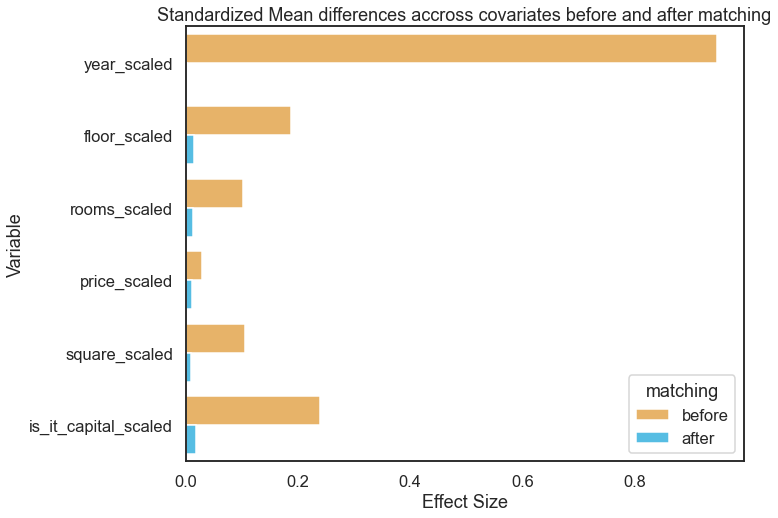

In [105]:
# график показывающих различия между treatment и control для каждой фичи в datasete. Разницу показывают стандартизированную CohenВ
psm.effect_size_plot()

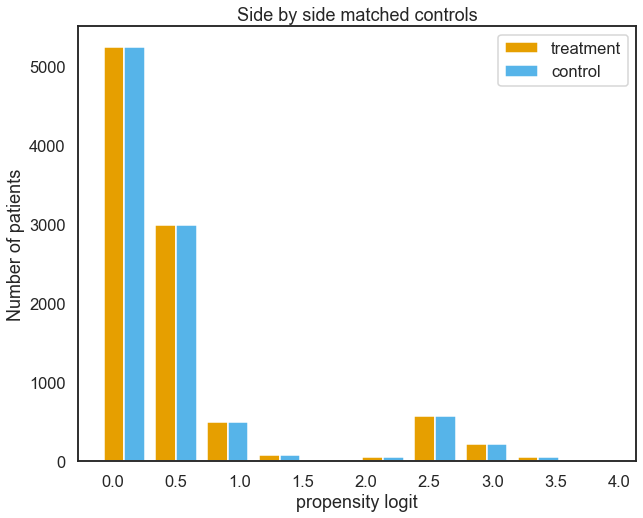

In [106]:
# посмотрим как теперь распределены значения PS
psm.plot_match()

In [107]:
sns.set(style='darkgrid', context='talk')

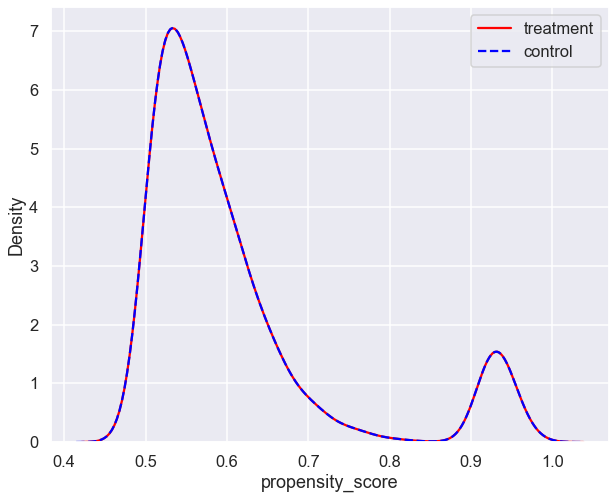

In [108]:
# отрисуем значение PS после матчинга
sns.kdeplot(df_matched['propensity_score'][df_matched['treatment'] == 1], color = 'red', label = 'treatment')
sns.kdeplot(df_matched['propensity_score'][df_matched['treatment'] == 0], color = 'blue', ls = '--', label = 'control')
plt.legend()
# видим, что все поменялось и PS стал похож на контрольную группу

## 5. Нахождение эффекта
Для нахождения эффекта будем использовать новую библиотеку (causal inference). т.к. с ней удобнее и быстрее проводить PSM анализ

Когда мы убедились в хорошем matching'е, пришло время оценить сам эффект. Эффекты бывают разные

ATE - Average Treatment Effect (Средний эффект воздействия)

ATC - Average Treatment effect on the Control group (Средний эффект воздействия с контрольной группы)

ATT - Average Treatment effect on the Treatment group (Средний эффект воздействия с группы с воздействием)

Когда мы делаем Matching для одной стороны, как в нашем случае сделали Matching для группы где не было воздействия, то мы считаем ATC. При полном matching'е, можно считать ATE.

In [10]:
# вспомним наши данные
df.head()

,year,floor,rooms,price,square,is_it_capital,treatment,cr,id
0,1975.00,5.00,1,8000,30.00,0,0,0.00,0
1,1970.00,2.00,1,8000,32.00,0,1,0.00,1
2,1980.00,1.00,1,7000,37.00,0,1,0.00,2
3,1975.00,3.00,1,5000,31.00,0,1,0.00,3
4,1985.00,8.00,1,10000,34.00,0,1,0.00,4


In [11]:
%%time
# используем готовую библиотеку для рассчета PS и матчинга по этой метрике

y = df[outcome].values # обозначаем нашу целевую метрику
t = df[treatment].values # обозначим treatment
X_ = df[['year', 'floor', 'rooms', 'price', 'square', 'is_it_capital']] 
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X_), 
                 columns=X_.columns).values # создадим матрику фичей для получения PS

model = CausalModel(y, t, X_scaled) # инициируем модель причинной связи
print(model.summary_stats) # выведем summary по causal модели
model.est_propensity() # сделаем оценку propensity score с помощью логистической регресии
# результаты отработки модели
print(model.propensity)

propensity_score = model.raw_data['pscore'] # достаем рассчитанный propensity score

# сделаем logit преобразование из PS
propensity_score = np.where(propensity_score==1, 0.9999999999, propensity_score) # чтобы можно было делить на 0
a = propensity_score
b = 1 - propensity_score
c = a / b # (p|1-p) = шанс
propensity_logit = pd.DataFrame(np.log(c)).replace(np.inf, 0).values # преобразование в propensity_logit

model = CausalModel(y, t, propensity_logit) # инициируем модель причинной связи на уже по единственной метрике PS logit
model.est_via_matching() # производим матчинг 

print(model.estimates) # выводим оценку эффекта


Summary Statistics

                      Controls (N_c=9706)       Treated (N_t=25448)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        0.006        0.051        0.006        0.063       -0.000

                      Controls (N_c=9706)       Treated (N_t=25448)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        0.631        0.591       -0.241        1.019       -1.047
             X1       -0.135        0.952        0.052        1.013        0.190
             X2       -0.074        0.892        0.028        1.037        0.105
             X3       -0.021        0.120        0.008        1.173        0.035
             X4       -0.077        0.872        0.029        1.043        0.110
      

In [17]:
%%time
# а теперь проведем оценку через PSM но с дополнительным перебором ковариат с помощью функции est_propensity_s()
y = df[outcome].values
t = df[treatment].values
X_ = df[['year', 'floor', 'rooms', 'price', 'square', 'is_it_capital']]
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X_), 
                 columns=X_.columns).values
model = CausalModel(y, t, X_scaled) # инициируем модель причинной связи
print(model.summary_stats) # выведем summary по causal модели
model.est_propensity_s() # метод автоматически перебирает фичи модели чтобы максимизировать правдоподобие модели
print(model.propensity) # результаты отработки модели

propensity_score = model.raw_data['pscore']
propensity_score = np.where(propensity_score==1, 0.9999999999, propensity_score)
a = propensity_score
b = 1 - propensity_score
c = a / b
propensity_logit = pd.DataFrame(np.log(c)).replace(np.inf, 0).values # преобразование в propensity_logit

model = CausalModel(y, t, propensity_logit) # инициируем модель причинной связи
model.est_via_matching()

# Оценка эффекта
print(model.estimates)


Summary Statistics

                      Controls (N_c=9706)       Treated (N_t=25448)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        0.006        0.051        0.006        0.063       -0.000

                      Controls (N_c=9706)       Treated (N_t=25448)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        0.631        0.591       -0.241        1.019       -1.047
             X1       -0.135        0.952        0.052        1.013        0.190
             X2       -0.074        0.892        0.028        1.037        0.105
             X3       -0.021        0.120        0.008        1.173        0.035
             X4       -0.077        0.872        0.029        1.043        0.110
      

Видим, что модель PSM также как и простой матчинг не нашли никакого эффекта

# Небольшой пример по ATC, ATT, ATE

In [112]:
df = pd.DataFrame({
    'Имя': ['Рома', 'Вася', 'Саша', 'Маша'],
    'Treatment': [1, 0, 1, 0],
    'Итог, с treatment': [6, 6, 3, 3],
    'Итог, без treatment': [8, 8, 6, 6]
})

df

,Имя,Treatment,"Итог, с treatment","Итог, без treatment"
0,Рома,1,6,8
1,Вася,0,6,8
2,Саша,1,3,6
3,Маша,0,3,6


In [113]:
df['TC'] = df.apply(lambda row: row['Итог, с treatment'] - row['Итог, без treatment'] \
                        if row['Treatment'] == 0 else None, axis=1)
df['TT'] = df.apply(lambda row: row['Итог, с treatment'] - row['Итог, без treatment'] \
                        if row['Treatment'] == 1 else None, axis=1)
df['TE'] = df.apply(lambda row: row['Итог, с treatment'] - row['Итог, без treatment'], axis=1)
df

,Имя,Treatment,"Итог, с treatment","Итог, без treatment",TC,TT,TE
0,Рома,1,6,8,NaN,-2.00,-2
1,Вася,0,6,8,-2.00,NaN,-2
2,Саша,1,3,6,NaN,-3.00,-3
3,Маша,0,3,6,-3.00,NaN,-3


In [114]:
df.iloc[:, -3:].mean()

TC   -2.50
TT   -2.50
TE   -2.50
dtype: float64

Значения z и p-value можно вывести как табличку сверху, но нет самих значении в реализации этой библиотеки, поэтому можно посчитать руками.

С помощью пару математических трюков можем достать значения статистики z, а так же p-value имея этот z.

In [115]:
# рассчитаем p-value вручную 
metric = 'atc'
model_estimates = model.estimates.get('matching')
z = model_estimates.get(metric) / model_estimates.get(metric+'_se')
p_value_z = (1 - st.norm.cdf(abs(z))) * 2
print('z statistic =', z)
print('p-value =', p_value_z)

z statistic = 0.6564682660634575
p-value = 0.51152287928522


# 6. Сравнение с  АБ тестом. Кейс №2.
Далее поработаем с новыми данными. Хотим проанализировать датасет с объявлениями и выручкой, рандомно определяем контрольную и тестовую группу A и B. Данные синтетические. Т.е. тут нет никакого эффекта, мы будем его симулировать, чтобы можно было понять: работает ли PSM не хуже АБ-теста

In [19]:
# получим датасет без эффекта
np.random.seed(16)

initial_data = pd.read_csv('dataset_for_psm_2.csv', index_col = 0) # возьмем

df_n = initial_data.sample(frac = 0.35) # извлечем выборку 35%

df_n.dropna(subset = ['price'], inplace = True)
df_n.fillna(0, inplace = True)

def assign_ab(df): # функция разбивающая на АБ
    df['group'] = np.random.randint(2, size=len(df))
    
assign_ab(df_n)

df_n.group.replace({0: 'A', 1: 'B'}, inplace = True) # переназовем для удобства в АБ-группы
df_n

,execution_date,advert_id,cat_id,price,year,floor,rooms,square,user_type,revenue,group
13932,2023-05-12,542324906.00,1,16700000.00,2022,9.00,1,37,2,0,A
24675,2023-05-12,546107529.00,1,17000000.00,1993,2.00,2,47,3,0,B
40891,2023-05-12,544566924.00,1,37500000.00,2004,1.00,3,76,1,0,A
43975,2023-05-12,545686811.00,1,45500000.00,2013,7.00,3,88,2,0,B
20962,2023-05-12,544362657.00,1,22000000.00,2014,4.00,1,42,1,0,A
...,...,...,...,...,...,...,...,...,...,...,...
44439,2023-05-12,540160939.00,1,45000000.00,2004,3.00,3,90,1,0,A
14821,2023-05-12,542003250.00,1,18000000.00,2021,5.00,1,38,1,0,A
32845,2023-05-12,545480976.00,1,35500000.00,2020,3.00,2,60,2,0,B
7547,2023-05-12,545713048.00,1,40500000.00,2016,7.00,3,99,1,0,A


In [20]:
# проверим баланс разбиения
df_n.groupby(['group']).agg({'advert_id': 'count'}) / len(df_n)

,advert_id
group,
A,0.50
B,0.50


Имеем 50% - 50% для A - B групп

#### Добавим эффект от нововведения в treatment группу

In [21]:
# добавляем использование treatment лишь некоторым в группе B. Так как и происходит в обычной жизни
df_n.loc[df_n['group'] == 'B', 'treatment'] = np.random.choice([0, 1], 
                                                               size = len(df_n[df_n['group'] == 'B']),
                                                               p = [0.3, 0.7]) # 70% объявлений в группе Б воспользовались нововведением
df_n.treatment.fillna(0, inplace = True)
df_n

,execution_date,advert_id,cat_id,price,year,floor,rooms,square,user_type,revenue,group,treatment
13932,2023-05-12,542324906.00,1,16700000.00,2022,9.00,1,37,2,0,A,0.00
24675,2023-05-12,546107529.00,1,17000000.00,1993,2.00,2,47,3,0,B,1.00
40891,2023-05-12,544566924.00,1,37500000.00,2004,1.00,3,76,1,0,A,0.00
43975,2023-05-12,545686811.00,1,45500000.00,2013,7.00,3,88,2,0,B,1.00
20962,2023-05-12,544362657.00,1,22000000.00,2014,4.00,1,42,1,0,A,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
44439,2023-05-12,540160939.00,1,45000000.00,2004,3.00,3,90,1,0,A,0.00
14821,2023-05-12,542003250.00,1,18000000.00,2021,5.00,1,38,1,0,A,0.00
32845,2023-05-12,545480976.00,1,35500000.00,2020,3.00,2,60,2,0,B,1.00
7547,2023-05-12,545713048.00,1,40500000.00,2016,7.00,3,99,1,0,A,0.00


In [22]:
# аггрегируем
ab_t = df_n.groupby(['group', 'treatment']).agg({'advert_id': 'count'})

b_p = (ab_t.values[2] / (ab_t.values[1] + ab_t.values[2]))[0]*100
a_p = (ab_t.values[1] / (ab_t.values[1] + ab_t.values[2]))[0]*100

print('Treatment 1 and 0 within B = {:.0f}% - {:.0f}%'.format(b_p, a_p))

ab_t

Treatment 1 and 0 within B = 71% - 29%


advert_id
group treatment           
A     0.00            7945
B     0.00            2322
      1.00            5577

Добавляем ещё больше treatment'a в зависимости от некоторых ковариат, в данном случае если год постройки и комнатности больше среднего то пусть будет treatment = 1.

In [23]:
# добавляем доп treatment в зависимости от года постройки и комнатности. Чтобы появилось смещенная склонность к treatment
df_n.loc[(df_n['group'] == 'B') & (df_n['year'] >= int(df_n.year.quantile(0.8))) &\
          (df_n['rooms'] >= int(df_n.rooms.quantile(0.8))),
          'treatment'] = 1

In [24]:
# посмотрим как изменилась ситуация
ab_t = df_n.groupby(['group', 'treatment']).agg({'advert_id': 'count'})

b_p = (ab_t.values[2] / (ab_t.values[1] + ab_t.values[2]))[0]*100
a_p = (ab_t.values[1] / (ab_t.values[1] + ab_t.values[2]))[0]*100

print('Treatment 1 and 0 within B = {:.0f}% - {:.0f}%'.format(b_p, a_p))

ab_t

Treatment 1 and 0 within B = 72% - 28%


advert_id
group treatment           
A     0.00            7945
B     0.00            2206
      1.00            5693

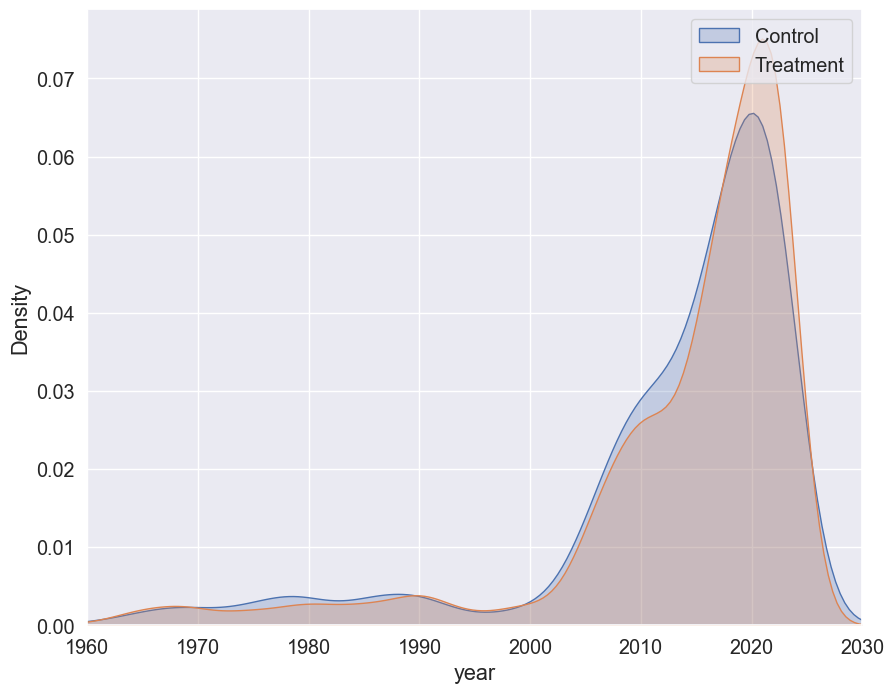

In [25]:
# посмотрим как распределены фичи в зависимости от treatment
sns.kdeplot(data = df_n[(df_n['treatment']==0) & (df_n['group'] == 'B')], x = 'year', fill = True, label = 'Control')
sns.kdeplot(data = df_n[(df_n['treatment']==1) & (df_n['group'] == 'B')], x = 'year', fill = True, label = 'Treatment')
plt.xlim(1960, 2030)
plt.legend();

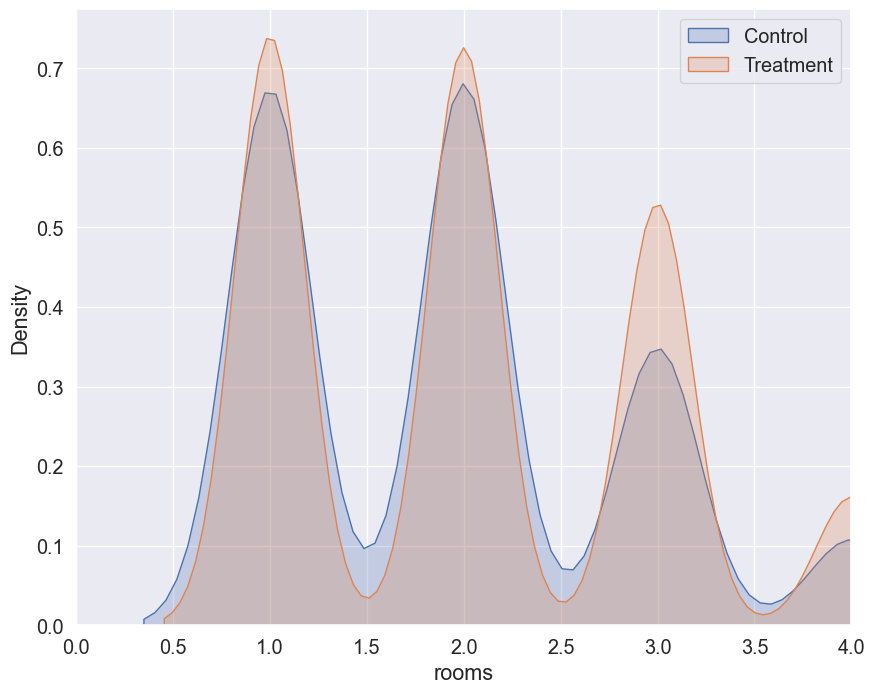

In [26]:
# посмотрим как распределены фичи в зависимости от treatment
sns.kdeplot(data = df_n[(df_n['treatment']==0) & (df_n['group'] == 'B')], x = 'rooms', fill = True, label = 'Control')
sns.kdeplot(data = df_n[(df_n['treatment']==1) & (df_n['group'] == 'B')], x = 'rooms', fill = True, label = 'Treatment')
plt.xlim(0, 4)
plt.legend();

Так же можем наблюдать что мы добавили зависимость от этих двух ковариат, год постройки и комнатность, значения treatment'а для этих ковариат отличаются

In [27]:
# пока эффекта не должно быть на revenue / проверим
df_n.groupby(['group']).agg({'revenue': 'mean'})

,revenue
group,
A,105.04
B,95.76


(0.0, 1000.0)

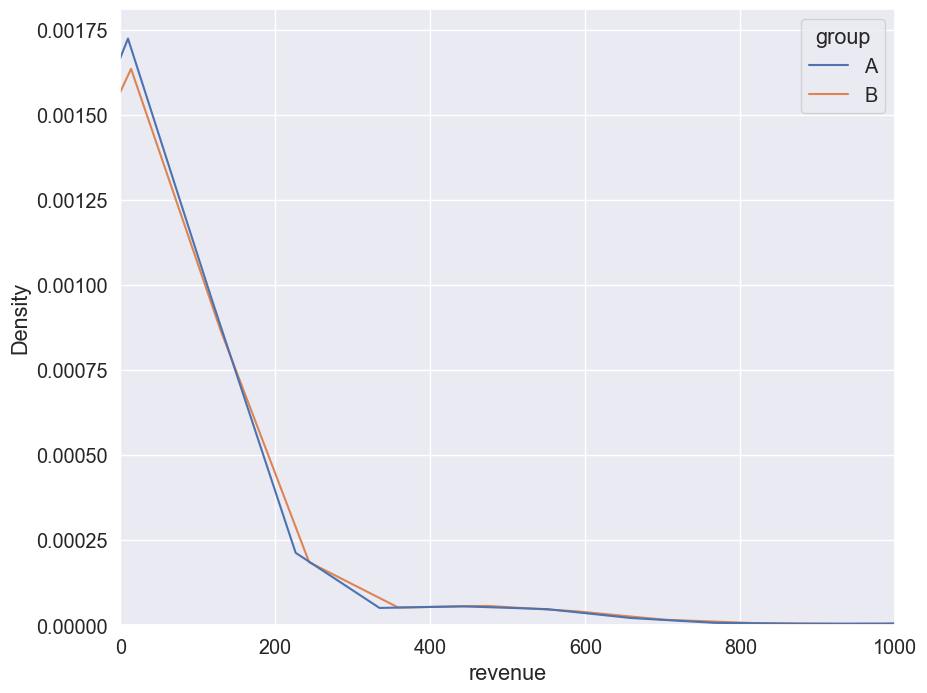

In [29]:
sns.kdeplot(df_n, x= 'revenue', hue = 'group')
plt.xlim(0, 1000)

In [30]:
# проверим разницу t-test на revenue (AA вариант)
values_A = df_n.query("group == 'A'").revenue
values_B = df_n.query("group == 'B'").revenue
print('Размер выборок A и B:', len(values_A), len(values_B))
print('Средняя в группе А', round(values_A.mean(), 2), 'Средняя в группе B', round(values_B.mean(), 2))
t_stat_ttest, p_value_ttest = ttest_ind(values_A, values_B)
print('T-test p-values =', p_value_ttest)

Размер выборок A и B: 7945 7899
Средняя в группе А 105.04 Средняя в группе B 95.76
T-test p-values = 0.3672144494627002


In [32]:
%%time

y = df_n['revenue'].values
t = df_n['treatment'].values
X_ = df_n[['price', 'year', 'floor', 'rooms', 'square', 'user_type']]
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X_), 
                 columns=X_.columns).values
model = CausalModel(y, t, X_scaled) # инициируем модель причинной связи
print(model.summary_stats)
model.est_propensity() # сделаем оценку propensity score с помощью логистической регресии

propensity_score = model.raw_data['pscore']
propensity_score = np.where(propensity_score==1, 0.9999999999, propensity_score)

a = propensity_score
b = 1 - propensity_score
c = a / b
propensity_logit = pd.DataFrame(np.log(c)).replace(np.inf, 0).values # преобразование в propensity_logit

model = CausalModel(y, t, propensity_logit) # инициируем модель причинной связи
model.est_via_matching()
print(model.estimates)


Summary Statistics

                     Controls (N_c=10151)        Treated (N_t=5693)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y       97.665      582.983      105.313      750.333        7.647

                     Controls (N_c=10151)        Treated (N_t=5693)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0       -0.005        0.997        0.009        1.005        0.015
             X1       -0.007        1.002        0.012        0.997        0.019
             X2        0.005        0.994       -0.008        1.011       -0.013
             X3       -0.021        0.991        0.037        1.014        0.058
             X4       -0.012        1.007        0.021        0.986        0.034
      

## Добавим эффект

In [33]:
# добвляем эффект для тех у ого был использованный treatment (+20%)
print('Среднее revenue до ', df_n['revenue'].mean())
df_n.loc[df_n['treatment'] == 1, 'revenue'] *= 1.2
print('Среднее revenue после добавления эффекта ', df_n['revenue'].mean())

Среднее revenue до  100.41327947488008
Среднее revenue после добавления эффекта  107.98139358747791


In [38]:
rev_ab = df_n.groupby(['group']).agg({'revenue': 'mean'})
rev_tc = df_n.groupby(['treatment']).agg({'revenue': 'mean'})
print('Diff B VS A: =', round(rev_ab.values[1][0] - rev_ab.values[0][0], 2))
print('Diff T==1 VS T==0 =', round(rev_tc.values[1][0] - rev_tc.values[0][0], 2))
print(rev_ab)
print(rev_tc)

Diff B VS A: = 5.89
Diff T==1 VS T==0 = 28.71
       revenue
group         
A       105.04
B       110.94
           revenue
treatment         
0.00         97.67
1.00        126.38


(0.0, 1000.0)

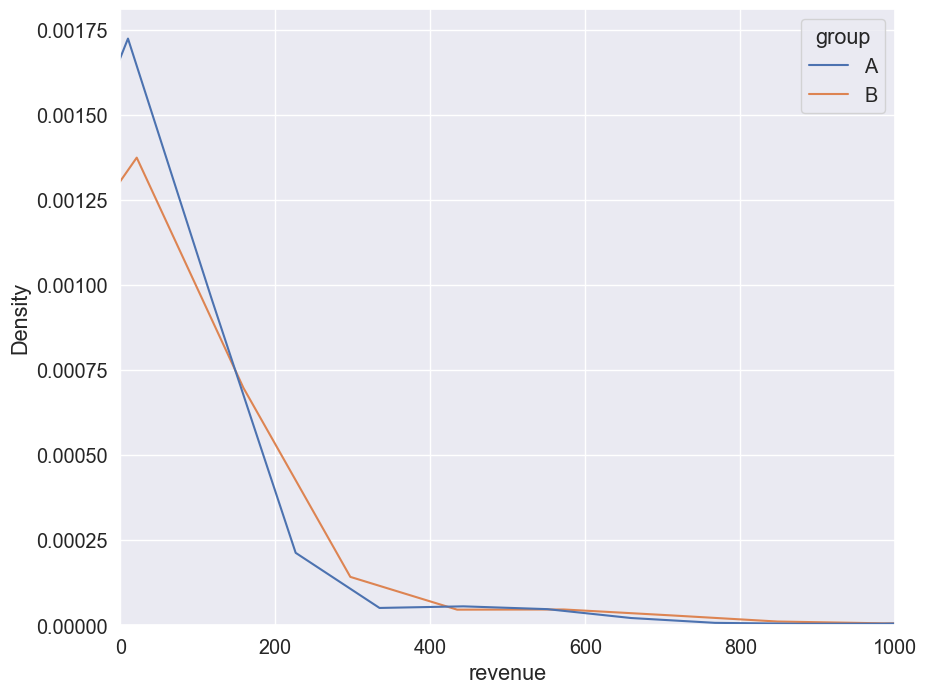

In [40]:
sns.kdeplot(df_n, x= 'revenue', hue = 'group')
plt.xlim(0, 1000)

In [41]:
# проверим эффект обычным t-test
values_A = df_n.query("group == 'A'").revenue
values_B = df_n.query("group == 'B'").revenue

print('Средняя в группе А', values_A.mean(), 'Средняя в группе B', values_B.mean())

t_stat_ttest, p_value_ttest = ttest_ind(values_A, values_B)
print('T-test p-values =', p_value_ttest)

Средняя в группе А 105.04266834487099 Средняя в группе B 110.93723256108368
T-test p-values = 0.6031595261774976


In [42]:
%%time

y = df_n['revenue'].values
t = df_n['treatment'].values
X_ = df_n[['price', 'year', 'floor', 'rooms', 'square', 'user_type']]
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X_), 
                 columns=X_.columns).values
model = CausalModel(y, t, X_scaled) # инициируем модель причинной связи
print(model.summary_stats)
model.est_propensity() # сделаем оценку propensity score с помощью логистической регресии
print(model.propensity) # результаты отработки модели

propensity_score = model.raw_data['pscore']
propensity_score = np.where(propensity_score==1, 0.9999999999, propensity_score)

a = propensity_score
b = 1 - propensity_score
c = a / b
propensity_logit = pd.DataFrame(np.log(c)).replace(np.inf, 0).values # преобразование в propensity_logit

model = CausalModel(y, t, propensity_logit) # инициируем модель причинной связи
model.est_via_matching()
print(model.estimates)


Summary Statistics

                     Controls (N_c=10151)        Treated (N_t=5693)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y       97.665      582.983      126.375      900.400       28.710

                     Controls (N_c=10151)        Treated (N_t=5693)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0       -0.005        0.997        0.009        1.005        0.015
             X1       -0.007        1.002        0.012        0.997        0.019
             X2        0.005        0.994       -0.008        1.011       -0.013
             X3       -0.021        0.991        0.037        1.014        0.058
             X4       -0.012        1.007        0.021        0.986        0.034
      

**видим что PSM на тех же данных не стат значим. Реализовалась  ошибка FN/ Также как и в t-test**

Давайте попробуем прогнать симуляцию и оценить мощность PSM

In [43]:
# напрямую из print(model.estimates) достать з-value не получится. рассчитаем его по доступным данным
metric = 'ate' # для сравнения с АБ. Будем оценивать p-value ATT эффекта
model_estimates = model.estimates.get('matching')
z = model_estimates.get(metric) / model_estimates.get(metric+'_se')
p_value_z = (1 - st.norm.cdf(abs(z))) * 2
print('z statistic =', z)
print('p-value =', p_value_z)

z statistic = 1.6362196712802242
p-value = 0.10179362088086163


## Анализ мощности PSM в сравнении с t-test

In [72]:
# создадим функцию которая "заточена" под наши данные и многократно создает выборки
# проверяет мощность и статзначимость под конкретный эффект
# вариант для замера ATE эффекта в PSM
n_sim = 100
def process_iteration(effects):
    p_vals = []
    
    for effect in effects:
        df_n = initial_data.sample(frac=0.5) # достаем выборку
        df_n.dropna(subset=['price'], inplace=True)  # убираем и заменямем на 0 NA
        df_n.fillna(0, inplace=True)

        assign_ab(df_n) 
        df_n.group.replace({0: 'A', 1: 'B'}, inplace=True) # раздаем группы

        df_n.loc[df_n['group'] == 'B', 'treatment'] = np.random.choice([0, 1],
                                                                       size=len(df_n[df_n['group'] == 'B']),
                                                                       p=[0.3, 0.7]) # treatment используют только 0,6

        df_n.loc[(df_n['group'] == 'B') & (df_n['year'] >= int(df_n.year.quantile(0.8))) &\
                 (df_n['rooms'] >= int(df_n.rooms.quantile(0.8))), # досыпаем treatment в зависимости от имеющихся данных
                 'treatment'] = 1
        df_n.treatment.fillna(0, inplace=True)

        df_n.loc[df_n['treatment'] == 1, 'revenue'] *= (1 + effect) # добавляем эффект

        rev_ab = df_n.groupby(['group']).agg({'revenue': 'mean'})
        b_minus_a = rev_ab.values[1][0] - rev_ab.values[0][0]

        # t-test
        values_A = df_n.query("group == 'A'").revenue
        values_B = df_n.query("group == 'B'").revenue

        t_stat_ttest, p_value_ttest = ttest_ind(values_A, values_B)

        # PSM
        y = df_n['revenue'].values
        t = df_n['treatment'].values
        X_ = df_n[['price', 'year', 'floor', 'rooms', 'square', 'user_type']]
        X_scaled = pd.DataFrame(StandardScaler().fit_transform(X_), 
                         columns=X_.columns).values
        model = CausalModel(y, t, X_scaled) # инициируем модель причинной связи
        model.est_propensity() # сделаем оценку propensity score с помощью логистической регресии

        propensity_score = model.raw_data['pscore']
        propensity_score = np.where(propensity_score==1, 0.9999999999, propensity_score)

        a = propensity_score
        b = 1 - propensity_score
        c = a / b
        propensity_logit = pd.DataFrame(np.log(c)).replace(np.inf, 0).values # преобразование в propensity_logit

        model = CausalModel(y, t, propensity_logit) # инициируем модель причинной связи
        model.est_via_matching()

        metric = 'ate'
        model_estimates = model.estimates.get('matching')
        z = model_estimates.get(metric) / model_estimates.get(metric+'_se')
        p_value_z = (1 - st.norm.cdf(abs(z))) * 2
        p_vals.append(p_value_ttest)
        p_vals.append(p_value_z)
        
    return p_vals

effects = [0, 0.01, 0.05, 0.1, 0.2, 0.5]
results = Parallel(n_jobs=-1)( #распараллелим вычисления
    delayed(process_iteration)(effects) for _ in tqdm(range(n_sim))
)

a_ate = pd.DataFrame(results, columns = ['p_value_1_0_t', 'p_value_1_0_p', # значение p-value для эффекта 1-0 для t и для PSM (p)
                                     'p_value_1_01_t', 'p_value_1_01_p',
                                     'p_value_1_05_t', 'p_value_1_05_p',
                                     'p_value_1_1_t', 'p_value_1_1_p',
                                     'p_value_1_2_t', 'p_value_1_2_p',
                                     'p_value_1_5_t', 'p_value_1_5_p'])



  0%|          | 0/100 [00:00<?, ?it/s]

  8%|▊         | 8/100 [00:00<00:03, 25.58it/s]

  8%|▊         | 8/100 [00:17<00:03, 25.58it/s]

 16%|█▌        | 16/100 [02:40<16:32, 11.82s/it]

 24%|██▍       | 24/100 [05:55<22:13, 17.55s/it]

 32%|███▏      | 32/100 [09:12<23:02, 20.33s/it]

 40%|████      | 40/100 [11:32<19:17, 19.29s/it]

 48%|████▊     | 48/100 [13:59<16:26, 18.98s/it]

 56%|█████▌    | 56/100 [16:01<13:01, 17.77s/it]

 64%|██████▍   | 64/100 [18:10<10:21, 17.27s/it]

 72%|███████▏  | 72/100 [20:32<08:07, 17.41s/it]

 80%|████████  | 80/100 [23:05<05:58, 17.94s/it]

 88%|████████▊ | 88/100 [25:17<03:29, 17.49s/it]

100%|██████████| 100/100 [27:13<00:00, 16.33s/it][A


In [73]:
# создадим функцию которая "заточена" под наши данные и многократно создает выборки
# проверяет мощность и статзначимость под конкретный эффект
# вариант для замера ATT эффекта в PSM
n_sim = 100
def process_iteration(effects):
    p_vals = []
    
    for effect in effects:
        df_n = initial_data.sample(frac=0.5) # достаем выборку
        df_n.dropna(subset=['price'], inplace=True)  # убираем и заменямем на 0 NA
        df_n.fillna(0, inplace=True)

        assign_ab(df_n) 
        df_n.group.replace({0: 'A', 1: 'B'}, inplace=True) # раздаем группы

        df_n.loc[df_n['group'] == 'B', 'treatment'] = np.random.choice([0, 1],
                                                                       size=len(df_n[df_n['group'] == 'B']),
                                                                       p=[0.3, 0.7]) # treatment используют только 0,6

        df_n.loc[(df_n['group'] == 'B') & (df_n['year'] >= int(df_n.year.quantile(0.8))) &\
                 (df_n['rooms'] >= int(df_n.rooms.quantile(0.8))), # досыпаем treatment в зависимости от имеющихся данных
                 'treatment'] = 1
        df_n.treatment.fillna(0, inplace=True)

        df_n.loc[df_n['treatment'] == 1, 'revenue'] *= (1 + effect) # добавляем эффект

        rev_ab = df_n.groupby(['group']).agg({'revenue': 'mean'})
        b_minus_a = rev_ab.values[1][0] - rev_ab.values[0][0]

        # t-test
        values_A = df_n.query("group == 'A'").revenue
        values_B = df_n.query("group == 'B'").revenue

        t_stat_ttest, p_value_ttest = ttest_ind(values_A, values_B)

        # PSM
        y = df_n['revenue'].values
        t = df_n['treatment'].values
        X_ = df_n[['price', 'year', 'floor', 'rooms', 'square', 'user_type']]
        X_scaled = pd.DataFrame(StandardScaler().fit_transform(X_), 
                         columns=X_.columns).values
        model = CausalModel(y, t, X_scaled) # инициируем модель причинной связи
        model.est_propensity() # сделаем оценку propensity score с помощью логистической регресии

        propensity_score = model.raw_data['pscore']
        propensity_score = np.where(propensity_score==1, 0.9999999999, propensity_score)

        a = propensity_score
        b = 1 - propensity_score
        c = a / b
        propensity_logit = pd.DataFrame(np.log(c)).replace(np.inf, 0).values # преобразование в propensity_logit

        model = CausalModel(y, t, propensity_logit) # инициируем модель причинной связи
        model.est_via_matching()

        metric = 'att'
        model_estimates = model.estimates.get('matching')
        z = model_estimates.get(metric) / model_estimates.get(metric+'_se')
        p_value_z = (1 - st.norm.cdf(abs(z))) * 2
        p_vals.append(p_value_ttest)
        p_vals.append(p_value_z)
        
    return p_vals

effects = [0, 0.01, 0.05, 0.1, 0.2, 0.5]
results = Parallel(n_jobs=-1)( #распараллелим вычисления
    delayed(process_iteration)(effects) for _ in tqdm(range(n_sim))
)

a_att = pd.DataFrame(results, columns = ['p_value_1_0_t', 'p_value_1_0_p', # значение p-value для эффекта 1-0 для t и для PSM (p)
                                     'p_value_1_01_t', 'p_value_1_01_p',
                                     'p_value_1_05_t', 'p_value_1_05_p',
                                     'p_value_1_1_t', 'p_value_1_1_p',
                                     'p_value_1_2_t', 'p_value_1_2_p',
                                     'p_value_1_5_t', 'p_value_1_5_p'])



  0%|          | 0/100 [00:00<?, ?it/s]

 16%|█▌        | 16/100 [01:34<08:17,  5.92s/it]

 24%|██▍       | 24/100 [03:49<13:16, 10.49s/it]

 32%|███▏      | 32/100 [05:33<12:55, 11.40s/it]

 40%|████      | 40/100 [07:23<12:13, 12.23s/it]

 48%|████▊     | 48/100 [09:44<12:09, 14.02s/it]

 56%|█████▌    | 56/100 [11:50<10:41, 14.59s/it]

 64%|██████▍   | 64/100 [13:47<08:45, 14.59s/it]

 72%|███████▏  | 72/100 [15:56<07:01, 15.06s/it]

 80%|████████  | 80/100 [17:58<05:02, 15.14s/it]

 88%|████████▊ | 88/100 [20:29<03:15, 16.26s/it]

100%|██████████| 100/100 [22:52<00:00, 13.73s/it][A


In [56]:
a_ate

,p_value_1_0_t,p_value_1_0_p,p_value_1_01_t,p_value_1_01_p,p_value_1_05_t,p_value_1_05_p,p_value_1_1_t,p_value_1_1_p,p_value_1_2_t,p_value_1_2_p,p_value_1_5_t,p_value_1_5_p
0,0.91,0.79,0.15,0.38,0.36,0.66,0.87,0.51,0.20,0.43,0.00,0.00
1,0.88,0.96,0.60,0.72,0.59,0.75,0.60,0.55,0.01,0.15,0.00,0.05
2,0.42,0.96,0.82,0.88,0.48,0.97,0.37,0.74,0.00,0.01,0.00,0.00
3,0.38,0.70,0.22,0.44,0.98,0.46,0.37,0.18,0.17,0.12,0.00,0.03
4,0.50,0.78,0.55,0.26,0.13,0.68,1.00,0.56,0.04,0.12,0.09,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.72,0.78,0.18,0.52,0.42,0.84,0.81,0.58,0.72,0.86,0.15,0.06
96,0.89,0.22,0.65,0.76,0.45,0.93,0.59,0.19,0.02,0.13,0.04,0.02
97,0.16,0.72,0.93,0.51,0.60,0.51,0.89,0.74,0.01,0.08,0.00,0.00
98,0.76,0.26,0.76,0.53,0.14,0.06,0.07,0.17,0.73,0.70,0.02,0.08


In [57]:
res_ate = pd.DataFrame()
res_ate = pd.DataFrame(pd.concat([a_ate.iloc[:, :2].lt(0.05).sum(),
                        a_ate.iloc[:, 2:].ge(0.05).sum()])).T
res_ate /= n_sim
res_ate

,p_value_1_0_t,p_value_1_0_p,p_value_1_01_t,p_value_1_01_p,p_value_1_05_t,p_value_1_05_p,p_value_1_1_t,p_value_1_1_p,p_value_1_2_t,p_value_1_2_p,p_value_1_5_t,p_value_1_5_p
0,0.05,0.00,0.97,1.00,0.95,0.99,0.94,0.98,0.69,0.86,0.11,0.19


In [58]:
a_att

,p_value_1_0_t,p_value_1_0_p,p_value_1_01_t,p_value_1_01_p,p_value_1_05_t,p_value_1_05_p,p_value_1_1_t,p_value_1_1_p,p_value_1_2_t,p_value_1_2_p,p_value_1_5_t,p_value_1_5_p
0,0.03,0.86,0.84,0.85,0.46,0.68,0.63,0.91,0.28,0.15,0.00,0.05
1,0.10,0.19,0.84,0.99,0.88,0.63,0.51,0.44,0.01,0.03,0.01,0.02
2,0.51,0.23,0.22,0.61,0.41,0.77,0.53,0.98,0.63,0.62,0.00,0.02
3,0.56,0.79,0.56,0.31,0.18,0.09,0.84,0.37,0.10,0.03,0.00,0.00
4,0.60,0.50,0.27,0.30,0.51,0.96,0.83,0.24,0.62,0.62,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.54,0.25,0.83,1.00,0.80,0.58,0.62,0.30,0.57,0.54,0.00,0.04
96,0.75,0.44,0.11,0.63,0.96,0.59,0.79,0.82,0.03,0.11,0.02,0.02
97,0.57,0.86,0.78,0.78,0.51,0.95,0.92,0.78,0.32,0.85,0.02,0.02
98,0.04,0.25,0.93,0.39,0.81,0.80,0.60,0.65,0.02,0.05,0.00,0.00


In [59]:
res_att = pd.DataFrame()
res_att = pd.DataFrame(pd.concat([a_att.iloc[:, :2].lt(0.05).sum(),
                        a_att.iloc[:, 2:].ge(0.05).sum()])).T
res_att /= n_sim
res_att

,p_value_1_0_t,p_value_1_0_p,p_value_1_01_t,p_value_1_01_p,p_value_1_05_t,p_value_1_05_p,p_value_1_1_t,p_value_1_1_p,p_value_1_2_t,p_value_1_2_p,p_value_1_5_t,p_value_1_5_p
0,0.09,0.01,0.98,0.98,0.94,0.97,0.96,0.98,0.62,0.84,0.06,0.28


In [71]:
pd.concat([res_ate, res_att], keys = ['ATE', 'ATT'])

,,p_value_1_0_t,p_value_1_0_p,p_value_1_01_t,p_value_1_01_p,p_value_1_05_t,p_value_1_05_p,p_value_1_1_t,p_value_1_1_p,p_value_1_2_t,p_value_1_2_p,p_value_1_5_t,p_value_1_5_p
ATE,0,0.05,0.00,0.97,1.00,0.95,0.99,0.94,0.98,0.69,0.86,0.11,0.19
ATT,0,0.09,0.01,0.98,0.98,0.94,0.97,0.96,0.98,0.62,0.84,0.06,0.28


Citations: 
* https://builtin.com/data-science/propensity-score-matching
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2943670/pdf/nihms200640.pdf (Matching methods for causal inference: A review and a look forward)